<a href="https://colab.research.google.com/github/muhammadnadhir6/Project-Portofolio/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [ ]:
#Import library
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Import Data from Google Drive to DataFrame

In [ ]:
#Read csv from public google drive
url = 'https://drive.google.com/file/d/1iVi5k9OJ2xobQTglVNQ5vExqBcF27cF0/view?usp=drive_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

# Data Preview

In [ ]:
#Table information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


In [ ]:
df.describe()

,quantity,price,customer_id
count,461773.000000,461773.000000,360853.000000
mean,9.088892,4.569963,15557.611138
std,86.366467,153.411566,1593.728741
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,14210.000000
50%,3.000000,2.100000,15580.000000
75%,10.000000,4.210000,16938.000000
max,10200.000000,25111.090000,18287.000000


In [ ]:
#Table preview
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN


# Data Cleansing

In [ ]:
#Copying table
df_clean = df.copy()

In [ ]:
#Drop rows with null value
df_clean = df_clean.dropna()

In [ ]:
#Converting order date column data type into datetime
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], format='%Y-%m-%d %H:%M:%S')

<ipython-input-8-e8b5985068ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
#Making a new date column with month year format
df_clean['month_year'] = df_clean['order_date'].dt.to_period('M')

<ipython-input-9-41ff2cb6cc1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month_year'] = df_clean['order_date'].dt.to_period('M')


In [ ]:
#Transforming product name string into lower character
df_clean['product_name'] = df_clean['product_name'].str.lower()

In [ ]:
#Drop test rows based on product code and product name
df_clean = df_clean[df_clean['product_name'].str.contains('|'.join(['test', 'adjust']))==False]

In [ ]:
#Changing quantity with negative value into positive because it indicates cancelled order
df_clean['quantity'] = df_clean['quantity'].abs()

<ipython-input-12-d70cfb2cbcb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['quantity'] = df_clean['quantity'].abs()


In [ ]:
#Remove rows with zero or negative price value
df_clean = df_clean[df_clean['price']>0]

In [ ]:
#Make amount column by multiply price and quantity
df_clean['amount'] = df_clean['price']*df_clean['quantity']

<ipython-input-14-eb0a10f38ecc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['amount'] = df_clean['price']*df_clean['quantity']


In [ ]:
#Make order status column to indicate cancelled or delivered order based on order id
df_clean['order_status'] = np.where(df_clean['order_id'].str[:1]=='C', 'cancelled', 'delivered')

In [ ]:
#Rename product name for each product id with product name with the most order count
most_freq_product_name = df_clean.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
df_clean = df_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
df_clean['product_name'] = df_clean['most_freq_product_name']
df_clean = df_clean.drop(columns='most_freq_product_name')

In [ ]:
#Convert the data type of customer id into string
df_clean['customer_id'] = df_clean['customer_id'].astype(str)

In [ ]:
#Remove outlier
df_clean = df_clean[(np.abs(stats.zscore(df_clean[['quantity','amount']]))<3).all(axis=1)]
df_clean = df_clean.reset_index(drop=True)

In [ ]:
df_clean

,order_id,product_code,product_name,quantity,order_date,price,customer_id,month_year,amount,order_status
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590.0,2010-01,4.25,cancelled
1,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01,91.80,delivered
2,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,2010-01,51.00,delivered
3,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,2010-01,5.10,delivered
4,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,2010-01,8.50,delivered
...,...,...,...,...,...,...,...,...,...,...
347602,539988,84380,set of 3 butterfly cookie cutters,1,2010-12-23 16:06:00,1.25,18116.0,2010-12,1.25,delivered
347603,539988,84849D,hot baths soap holder,1,2010-12-23 16:06:00,1.69,18116.0,2010-12,1.69,delivered
347604,539988,84849B,fairy soap soap holder,1,2010-12-23 16:06:00,1.69,18116.0,2010-12,1.69,delivered
347605,539988,22854,cream sweetheart egg holder,2,2010-12-23 16:06:00,4.95,18116.0,2010-12,9.90,delivered


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360795 entries, 0 to 360794
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      360795 non-null  object        
 1   product_code  360795 non-null  object        
 2   product_name  360795 non-null  object        
 3   quantity      360795 non-null  int64         
 4   order_date    360795 non-null  datetime64[ns]
 5   price         360795 non-null  float64       
 6   customer_id   360795 non-null  object        
 7   month_year    360795 non-null  period[M]     
 8   amount        360795 non-null  float64       
 9   order_status  360795 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 30.3+ MB


# User Retention Analysis

In [ ]:
#View order count per customer each month
df_user_monthly = df_clean.groupby(['month_year', 'customer_id'], as_index=False).agg(order_cnt=('order_id', 'nunique')).sort_values('month_year', ascending=True)
df_user_monthly

,month_year,customer_id,order_cnt
0,2010-01,12748.0,5
443,2010-01,16204.0,1
444,2010-01,16206.0,1
445,2010-01,16210.0,1
446,2010-01,16229.0,1
...,...,...,...
11144,2010-12,14867.0,1
11145,2010-12,14871.0,1
11146,2010-12,14878.0,1
11278,2010-12,15759.0,1


In [ ]:
#Make cohort
df_user_monthly['cohort'] = df_user_monthly.groupby('customer_id')['month_year'].transform('min')
df_user_monthly

,month_year,customer_id,order_cnt,cohort
0,2010-01,12748.0,5,2010-01
443,2010-01,16204.0,1,2010-01
444,2010-01,16206.0,1,2010-01
445,2010-01,16210.0,1,2010-01
446,2010-01,16229.0,1,2010-01
...,...,...,...,...
11144,2010-12,14867.0,1,2010-01
11145,2010-12,14871.0,1,2010-03
11146,2010-12,14878.0,1,2010-02
11278,2010-12,15759.0,1,2010-01


In [ ]:
#Calculating month gap for each transaction
df_user_monthly['period_num'] = (df_user_monthly['month_year'] - df_user_monthly['cohort']).apply(attrgetter('n')) + 1
df_user_monthly

,month_year,customer_id,order_cnt,cohort,period_num
0,2010-01,12748.0,5,2010-01,1
443,2010-01,16204.0,1,2010-01,1
444,2010-01,16206.0,1,2010-01,1
445,2010-01,16210.0,1,2010-01,1
446,2010-01,16229.0,1,2010-01,1
...,...,...,...,...,...
11144,2010-12,14867.0,1,2010-01,12
11145,2010-12,14871.0,1,2010-03,10
11146,2010-12,14878.0,1,2010-02,11
11278,2010-12,15759.0,1,2010-01,12


In [ ]:
#Make pivot table
df_cohort_pivot = pd.pivot_table(df_user_monthly, index='cohort', columns='period_num', values='customer_id', aggfunc=pd.Series.nunique)
df_cohort_pivot

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,672.0,261.0,318.0,293.0,286.0,286.0,272.0,248.0,260.0,296.0,312.0,232.0
2010-02,458.0,155.0,132.0,165.0,152.0,121.0,122.0,156.0,156.0,168.0,101.0,NaN
2010-03,515.0,142.0,155.0,140.0,137.0,117.0,145.0,185.0,186.0,96.0,NaN,NaN
2010-04,320.0,80.0,76.0,62.0,65.0,78.0,99.0,104.0,49.0,NaN,NaN,NaN
2010-05,272.0,54.0,49.0,51.0,50.0,69.0,66.0,40.0,NaN,NaN,NaN,NaN
2010-06,264.0,51.0,55.0,58.0,63.0,84.0,38.0,NaN,NaN,NaN,NaN,NaN
2010-07,181.0,38.0,38.0,53.0,53.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,158.0,36.0,50.0,48.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,221.0,60.0,60.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Cohort size
cohort_size = df_cohort_pivot.iloc[:, 0]
cohort_size

cohort
2010-01    672.0
2010-02    458.0
2010-03    515.0
2010-04    320.0
2010-05    272.0
2010-06    264.0
2010-07    181.0
2010-08    158.0
2010-09    221.0
2010-10    358.0
2010-11    325.0
2010-12     65.0
Freq: M, Name: 1, dtype: float64

In [ ]:
#Make retention rate pivot table
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis=0)
df_retention_cohort

period_num,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,1.0,0.388393,0.473214,0.436012,0.425595,0.425595,0.404762,0.369048,0.386905,0.440476,0.464286,0.345238
2010-02,1.0,0.338428,0.288210,0.360262,0.331878,0.264192,0.266376,0.340611,0.340611,0.366812,0.220524,NaN
2010-03,1.0,0.275728,0.300971,0.271845,0.266019,0.227184,0.281553,0.359223,0.361165,0.186408,NaN,NaN
2010-04,1.0,0.250000,0.237500,0.193750,0.203125,0.243750,0.309375,0.325000,0.153125,NaN,NaN,NaN
2010-05,1.0,0.198529,0.180147,0.187500,0.183824,0.253676,0.242647,0.147059,NaN,NaN,NaN,NaN
2010-06,1.0,0.193182,0.208333,0.219697,0.238636,0.318182,0.143939,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.209945,0.209945,0.292818,0.292818,0.171271,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.227848,0.316456,0.303797,0.164557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,1.0,0.271493,0.271493,0.144796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


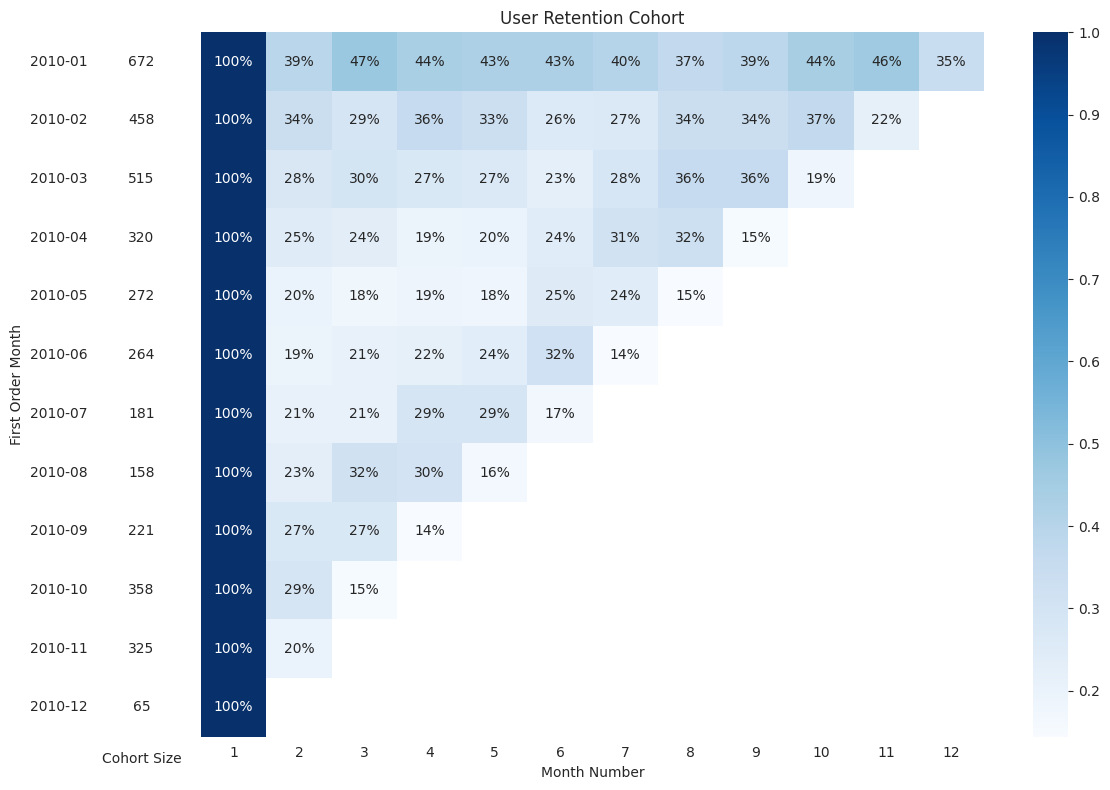

In [ ]:
with sns.axes_style('white'):

    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

    #User retention cohort
    sns.heatmap(df_retention_cohort, annot=True, fmt='.0%', cmap='Blues', ax=ax[1])
    ax[1].set_title('User Retention Cohort')
    ax[1].set(xlabel='Month Number', ylabel='')

    #Cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])

    fig.tight_layout()

#Insight

- Most users make their first transaction in January (672 users)
- January's cohort of users also retransacted the most in their second month (39%) compared to other cohorts
- Furthermore, January's cohort of users also also the most loyal users in the following months with a retention rate of around 40%
- Unfortunately, most of the users didn't make their next transaction judging by most of the retention rate didn't reach 50%
- December's retention rate became the lowest retention rate compared to the other months (20% or less)